<a href="https://colab.research.google.com/github/SJinLee/BasicStats/blob/main/advanced4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R 검정 실습

## 1. t검정

### 1.1 단일표본 t검정

**[사례]** 한국철강공장에서 2015년 1월 한 달 동안 생산된 철 제품에 대한 강도를 조사한 결과 모평균 μ=12(㎏/㎡)였다. 그리고 한 달 후 2월에 새로운 제조법으로 한 달 동안 생산한 16개의 철 제품에 대한 강도를 다시 조사한 결과 11, 12, 15, 14, 17, 20, 18, 14, 18, 11, 17, 14, 16, 13, 15, 19(㎏/㎡)로 조사되었다

모평균 μ는 차이가 있다고 할 수 있는가?

* t검정

In [1]:
stiffness <- c(11, 12, 15, 14, 17, 20, 18, 14, 18, 11, 17, 14, 16, 13, 15, 19)
tresult <- t.test(stiffness,mu=12)
tresult


	One Sample t-test

data:  stiffness
t = 4.695, df = 15, p-value = 0.0002875
alternative hypothesis: true mean is not equal to 12
95 percent confidence interval:
 13.77457 16.72543
sample estimates:
mean of x 
    15.25 


* 기준값

In [2]:
t95 <- qt(0.975,df=15)
t95

[1] 2.13145

* 유의수준

In [3]:
(1-pt(4.695,df=15))*2

[1] 0.0002875434

* 기준값의 위치

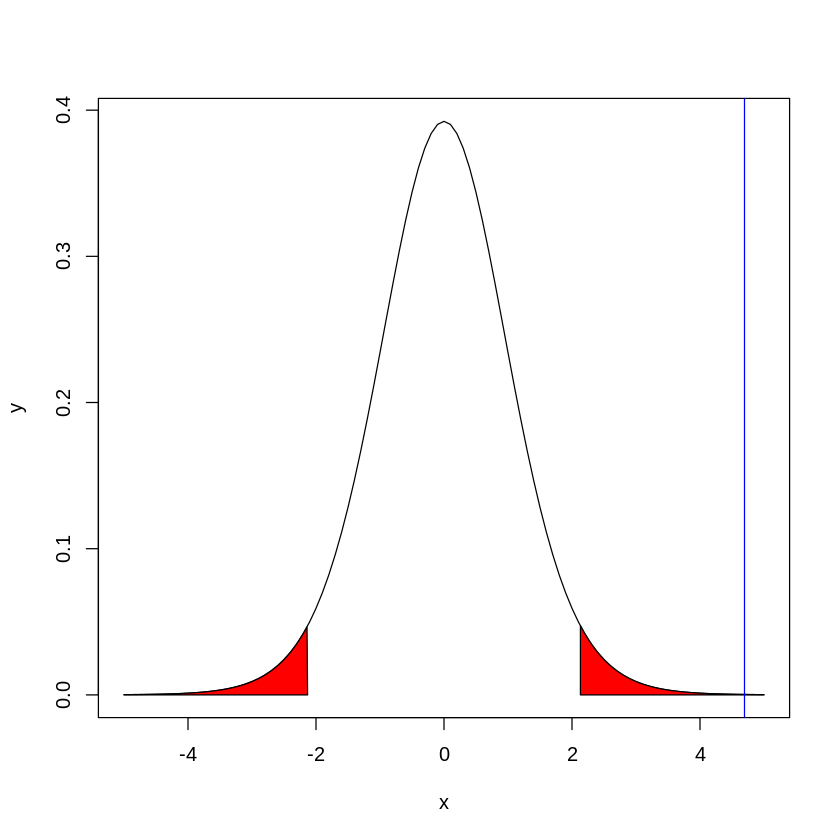

In [4]:
x <- seq(-5,5,0.1)
y <- dt(x,df=15)
plot(x,y,type='l')
x <- seq(-5,-t95,0.01)
y <- dt(x,df=15)
polygon(c(x,-t95,-5),c(y,0,0),col='red',border='black')
x <- seq(t95,5,0.01)
y <- dt(x,df=15)
polygon(c(x,5,t95),c(y,0,0),col='red',border='black')
abline(v=tresult$statistic,col='blue')

### 1.2 독립표본 t검정

**[사례]** 한국철강공장에서 열처리 후 늘어난 18개의 철 제품 길이 22, 19, 16, 17, 19, 16, 26, 24, 18, 19, 13, 16, 22, 18, 19, 22, 19, 26와 서울 철강공장에서 열처리 후 늘어난 16개의 철 제품의 길이 22, 20, 28, 24, 22, 28, 22, 19, 25, 21, 23, 24, 23, 23, 29, 23가 차이가 있다고 말할 수 있는가?

In [5]:
korea <- c(22, 19, 16, 17, 19, 16, 26, 24, 18, 19, 13, 16, 22, 18, 19, 22, 19, 26)
seoul <- c(22, 20, 28, 24, 22, 28, 22, 19, 25, 21, 23, 24, 23, 23, 29, 23)
df1 <- data.frame(stiffness=korea)
df1[['company']] <- 'korea'
df2 <- data.frame(stiffness=seoul)
df2[['company']] <- 'seoul'
df <- rbind(df1,df2)
df[['company']] = as.factor(df[['company']])
df

stiffness,company
<dbl>,<fct>
22,korea
19,korea
16,korea
17,korea
19,korea
16,korea
26,korea
24,korea
18,korea


* 등분산 검정

In [7]:
install.packages('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [8]:
library('car')

Loading required package: carData



In [9]:
lv <- leveneTest(stiffness~company,center=mean,data=df)
lv

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.9363021,0.3404875
,32,NA,NA


* t검정(이분산 가정)

In [10]:
t.test(korea,seoul,var.equal=F)


	Welch Two Sample t-test

data:  korea and seoul
t = -3.65, df = 31.651, p-value = 0.0009361
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.233227 -1.766773
sample estimates:
mean of x mean of y 
     19.5      23.5 


* t검정(등분산 가정)

In [11]:
tresult2 <- t.test(korea,seoul,var.equal=T)
tresult2


	Two Sample t-test

data:  korea and seoul
t = -3.6008, df = 32, p-value = 0.001059
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.262784 -1.737216
sample estimates:
mean of x mean of y 
     19.5      23.5 


* 기준값

In [12]:
qt(0.975,df=32)
pt(-3.6008,df=32)*2

[1] 2.036933

[1] 0.001059051

### 1.3 대응표본 t검정

**[사례]** 2015년도 한국대학교 경영학과 2학년 12명의 통계학 중간고사와 기말고사 시험 점수가 다음과 같이 나타났다고 가정하자

성명|A|B|C|D|E|F|G|H|I|J|K|L
---|---|---|---|---|---|---|---|---|---|---|---|---
중간고사|76|57|72|47|52|76|64|64|66|57|38|58
기말고사|89|60|71|65|60|70|71|69|68|66|50|62

이때 한국대학교 경영학과 2학년 통계학 중간고사와 기말고사 성적 간에 차이가 있다고 말할 수 있는가?

* t검정

In [13]:
ex1 <- c(76,57,72,47,52,76,64,64,66,57,38,58)
ex2 <- c(89,60,71,65,60,70,71,69,68,66,50,62)
result4 <- t.test(ex1,ex2,paired=TRUE)
result4


	Paired t-test

data:  ex1 and ex2
t = -3.2832, df = 11, p-value = 0.007292
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -10.300641  -2.032693
sample estimates:
mean difference 
      -6.166667 


* 기준값

In [14]:
qt(0.975,df=11)

[1] 2.200985

* 유의수준

In [15]:
pt(-3.2832,df=11)*2

[1] 0.007292225

## 2. F검정

### 2.1 일원배치 분산분석

**[사례]** A, B, C, D 4가지 식품에 대한 콜레스토롤 함유량 측정 결과가 다음과 같이 나타났다고 가정하자

구분|1|2|3
---|---|---|---
콜레스테롤A|3.6|4.1|4.0
콜레스테롤B|3.1|3.2|3.9
콜레스테롤C|3.2|3.5|3.5
콜레스테롤D|3.5|3.8|3.8

이때 4가지 식품에 대한 콜레스토롤 함유량이 차이가 있다고 말할 수 있는가? 참고로 여기서 인자는 식품의 유형이며, 인자가 취할 수 있는 상태는 콜레스토롤 수준을 말한다

In [16]:
c <- c(3.6,4.1,4.0,3.1,3.2,3.9,3.2,3.5,3.5,3.5,3.8,3.8)
df <- data.frame(cholesterol=c)
df[['company']] <- rep(LETTERS[1:4],each=3)
df

cholesterol,company
<dbl>,<chr>
3.6,A
4.1,A
4.0,A
3.1,B
3.2,B
3.9,B
3.2,C
3.5,C
3.5,C


In [17]:
av <- aov(df[['cholesterol']]~df[['company']])
summary(av)

                Df Sum Sq Mean Sq F value Pr(>F)
df[["company"]]  3   0.54    0.18    2.25   0.16
Residuals        8   0.64    0.08               

* 기준값

In [18]:
qf(0.95,df1=3,df2=8)

[1] 4.066181

* 유의수준

In [19]:
1-pf(2.25,df1=3,df2=8)

[1] 0.1597673

## 3. $\chi^2$ 검정

### 3.1 2x2분할표

**[사례]** 대한통신사의 스마트폰 신제품에 대한 인지율 표본조사 결과가 다음과 같이 나타났다고 가정하자

구분|남자|여자
---|---|---
모른다|457|446
알고있다|43|54

이때 대한통신사의 스마트폰 신제품에 대한 성별 인지율이 차이가 있는지를 검정하라

In [20]:
str(table(df))

 'table' int [1:8, 1:4] 0 0 0 1 0 0 1 1 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ cholesterol: chr [1:8] "3.1" "3.2" "3.5" "3.6" ...
  ..$ company    : chr [1:4] "A" "B" "C" "D"


In [21]:
tbl <- rbind(c(457,446),c(43,54))
tbl <- as.table(tbl)
dimnames(tbl)<-list(c('모른다','알고있다'),c('남자','여자'))
names(dimnames(tbl)) <- c('응답','성별')
tbl

          성별
응답     남자 여자
  모른다    457  446
  알고있다   43   54

* $\chi^2$검정

In [22]:
chisq.test(tbl)


	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl
X-squared = 1.1417, df = 1, p-value = 0.2853


* 기준값

In [23]:
qchisq(0.95,df=1)

[1] 3.841459

* 유의수준

In [24]:
1-pchisq(1.1417,df=1)

[1] 0.2852934

### 3.2 2xm분할표

**[사례]** 한국대학교 통계학과 1, 2, 3학년 학생들을 대상으로 축제에 참가 여부를 조사한 결과 다음과 같이 나타났다고 가정하자

구분|1학젼|2학년|3학년
---|---|---|--
참석|28|36|11
불참|22|44|9

이때 한국대학교 통계학과 학생들 학년별로 축제 참여율이 차이가 있는지를 검정하라

In [25]:
tbl <- rbind(c(28,36,11),c(22,44,9))
tbl <- as.table(tbl)
dimnames(tbl)<-list(c('참석','불참'),c('1학년','2학년','3학년'))
names(dimnames(tbl)) <- c('응답','학년')
tbl

      학년
응답 1학년 2학년 3학년
  참석    28    36    11
  불참    22    44     9

* $\chi^2$검정

In [26]:
chisq.test(tbl)


	Pearson's Chi-squared test

data:  tbl
X-squared = 1.72, df = 2, p-value = 0.4232


* 기준값

In [27]:
qchisq(0.95,df=2)

[1] 5.991465

* 유의수준

In [28]:
1-pchisq(1.72,df=2)

[1] 0.4231621

### 3.3 mxm 분할표

**[사례]** 한국대학교 통계학과 1, 2, 3, 4학년 학생들을 대상으로 취미를 조사한 결과 다음과 같이 나타났다고 가정하자

구분|1학젼|2학년|3학년|4학년
---|---|---|--|--
스포츠|20|6|7|9
독서|6|33|14|7
음악|9|7|29|8
영화|8|8|10|24

이때 한국대학교 통계학과 학생들 학년별로 취미 경향이 차이가 있는지를 검정하라

In [29]:
tbl <- rbind(c(20,6,7,9),c(6,33,14,7),c(9,7,29,8),c(8,8,10,24))
tbl <- as.table(tbl)
dimnames(tbl)<-list(c('스포츠','독서','음악','영화'),
                    c('1학년','2학년','3학년','4학년'))
names(dimnames(tbl)) <- c('취미','학년')
tbl

        학년
취미   1학년 2학년 3학년 4학년
  스포츠    20     6     7     9
  독서       6    33    14     7
  음악       9     7    29     8
  영화       8     8    10    24

* $\chi^2$검정

In [30]:
chisq.test(tbl)


	Pearson's Chi-squared test

data:  tbl
X-squared = 79.457, df = 9, p-value = 2.072e-13


* 기준값

In [31]:
qchisq(0.95,df=9)

[1] 16.91898

* 유의수준

In [32]:
1-pchisq(79.454,df=9)

[1] 2.073897e-13